Name :- Sourabh Solanki
    

Batch:- DS2403


Project Description


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


Independent Variables


1.	months_as_customer: Number of months of patronage
    
2.	age: the length of time a customer has lived or a thing has existed
    
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
    
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
    
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit
    
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
    
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
    
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
    
10.	insured_zip: It is the zip code where the insurance was made
    
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
    
12.	insured_education_level: This refers to the Level of education of the customer
    
13.	insured_occupation: This refers Occupation of the customer
    
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
    
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
        
16.	capital-gains: This refers to profit accrued due to insurance premium
    
17.	capital-loss: This refers to the losses incurred due to insurance claims
    
18.	incident_date: This refers to the date which claims where made by customers
    
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
    
20.	collision_type: This refers to the area of damage on the vehicle
    
21.	incident_severity: This refers to the extent/level of damage
    
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
    
23.	incident_state: This refers to the state at which the accident happened
    
24.	incident_city: This refers to the city at which the accident happened
    
25.	1ncident_location: This refers to the location at which the accident happened
    
26.	incident_hour_of_the_day: The period of the day which accident took place
    
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
    
28.	property_damage: This refers to whether property was damaged or not
    
29.	bodily_injuries: This refers to injuries sustained
    
30.	witnesses: This refers to the number of witnesses involved
    
31.	police_report_available: This refers to whether the report on damage was documented or not
    
32.	total_claim_amount: This refers to the financial implications involved in claims
    
33.	injury_claim: This refers to physical injuries sustained
    
34.	property_claim: This refers to property damages during incident
    
35.	vehicle_claim: This refers to property damages during incident
    
36.	auto_make: This refers to the make of the vehicle
    
37.	auto_model: This refers to the model of the vehicle
    
38.	auto_year: This refers to the year which the vehicle was manufactured
    
39.	_c39:
    
40.	fraud_reported


# Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Loading Data Sets

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The Dataset Conatins 1000 Rows and 40 Columns

In [4]:
#lets See further analysis 
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
# Check Data Type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# Info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


Here we see the last column _c39 was having nan values Its not important for us so we remove this column

In [8]:
df.drop('_c39', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking Missing Values 

In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [11]:
df.isna().sum().any()

True

In [12]:
df['authorities_contacted'].fillna('Unknown', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There is no null values in this data set

# Exploratory Data Analysis

In [15]:
#Convert Date To Date Time
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])


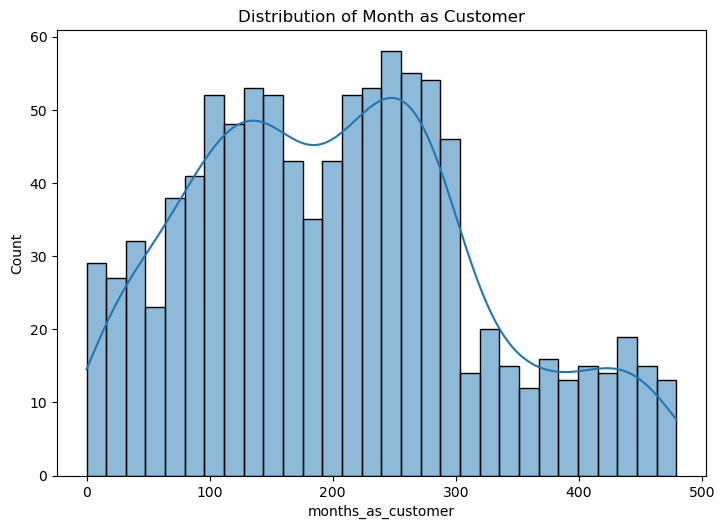

In [16]:
#Distribution of Moth as Customers
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(df['months_as_customer'], bins=30, kde=True)
plt.title('Distribution of Month as Customer')
plt.tight_layout()
plt.show()

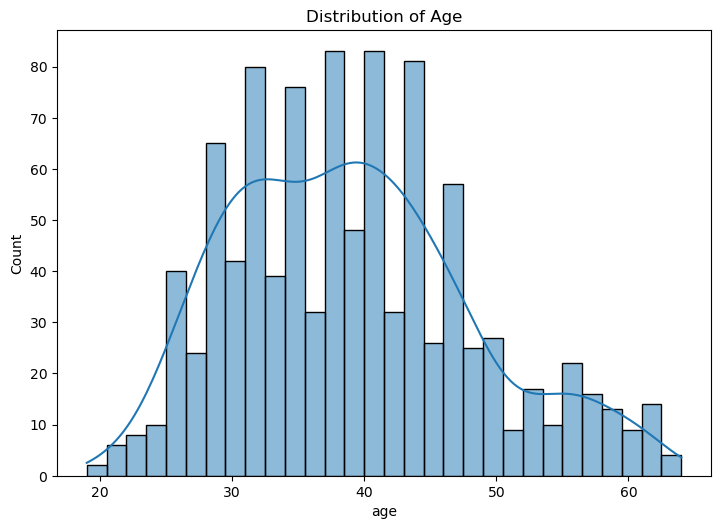

In [17]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,2)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

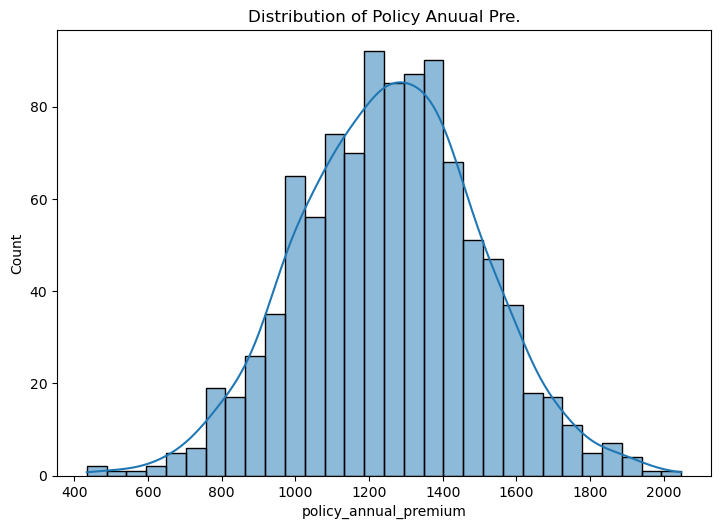

In [18]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,3)
sns.histplot(df['policy_annual_premium'], bins=30, kde=True)
plt.title('Distribution of Policy Anuual Pre.')
plt.tight_layout()
plt.show()

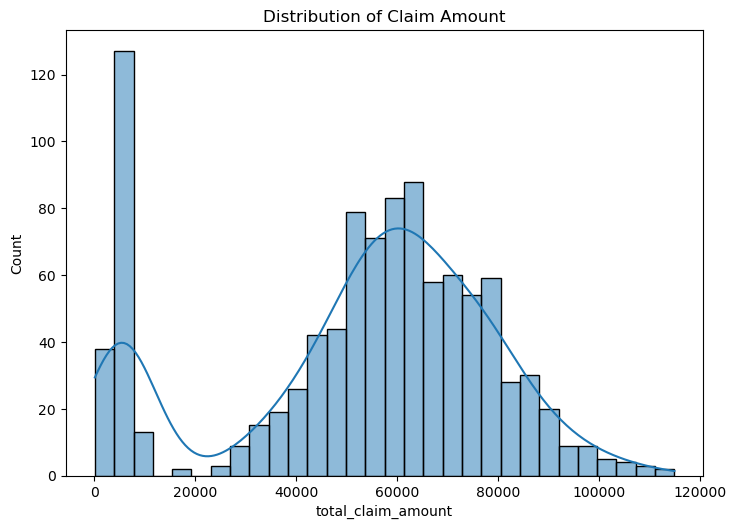

In [19]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,4)
sns.histplot(df['total_claim_amount'], bins=30, kde=True)
plt.title('Distribution of Claim Amount')
plt.tight_layout()
plt.show()

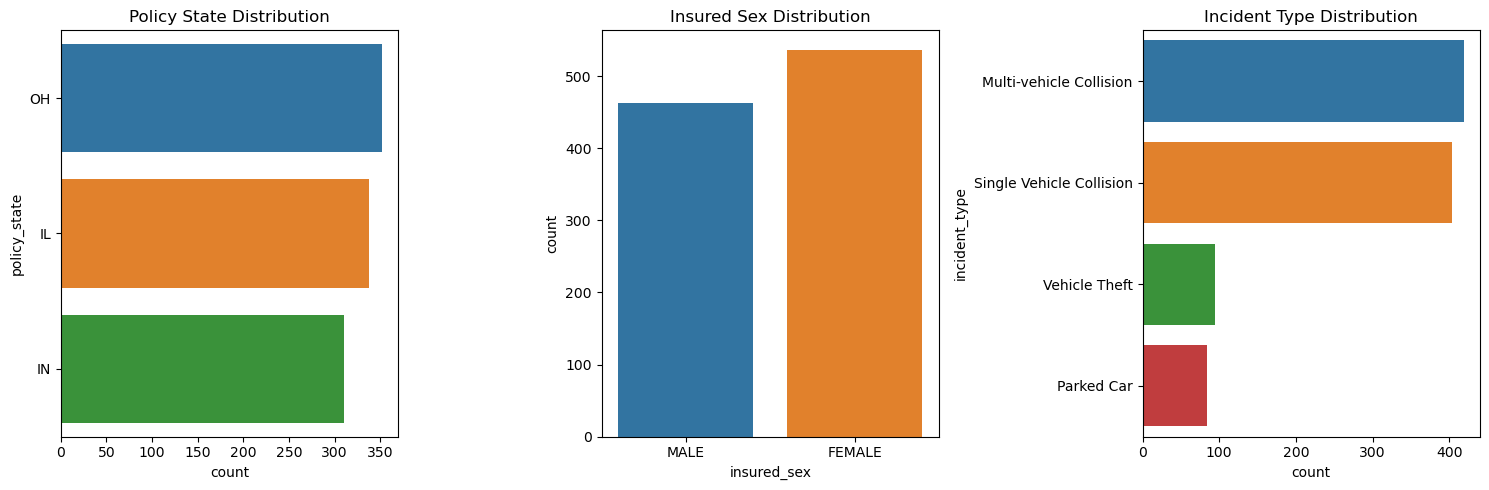

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(y='policy_state', data=df, order=df['policy_state'].value_counts().index)
plt.title('Policy State Distribution')

plt.subplot(1,3,2)
sns.countplot(x='insured_sex', data=df)
plt.title('Insured Sex Distribution')

plt.subplot(1,3,3)
sns.countplot(y='incident_type', data=df, order=df['incident_type'].value_counts().index)
plt.title('Incident Type Distribution')

plt.tight_layout()
plt.show()

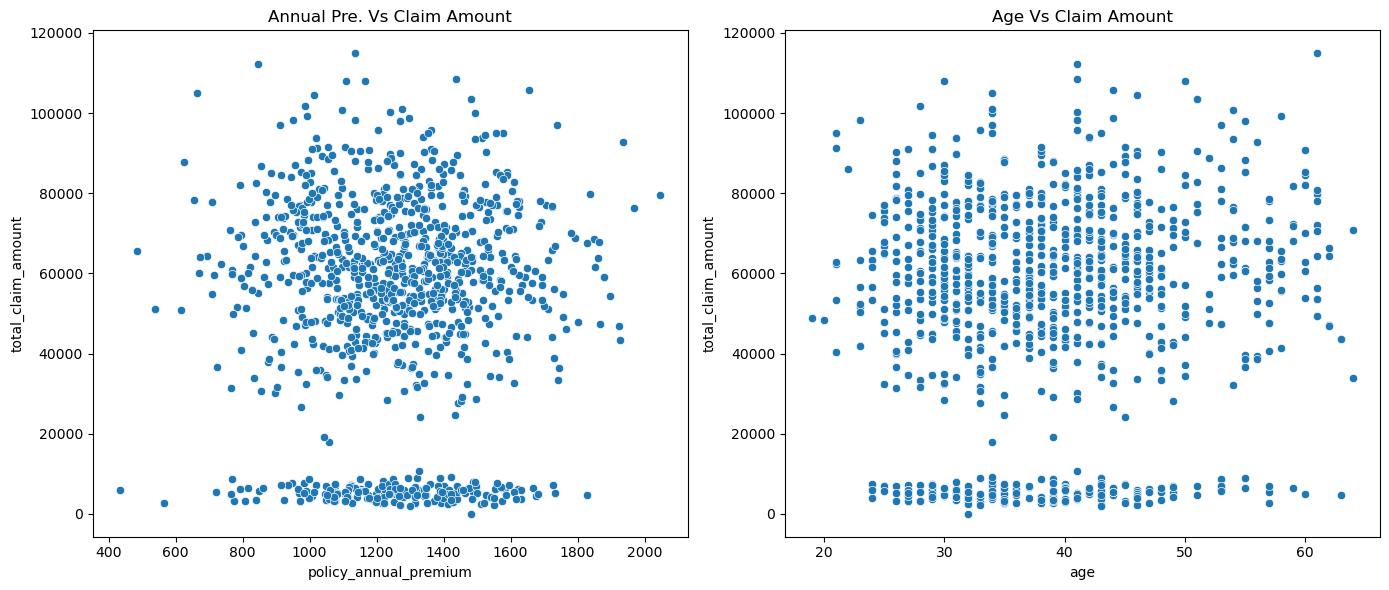

In [21]:
#Relationship Between Data
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=df)
plt.title('Annual Pre. Vs Claim Amount')

plt.subplot(1,2,2)
sns.scatterplot(x='age', y='total_claim_amount', data=df)
plt.title('Age Vs Claim Amount')

plt.tight_layout()
plt.show()

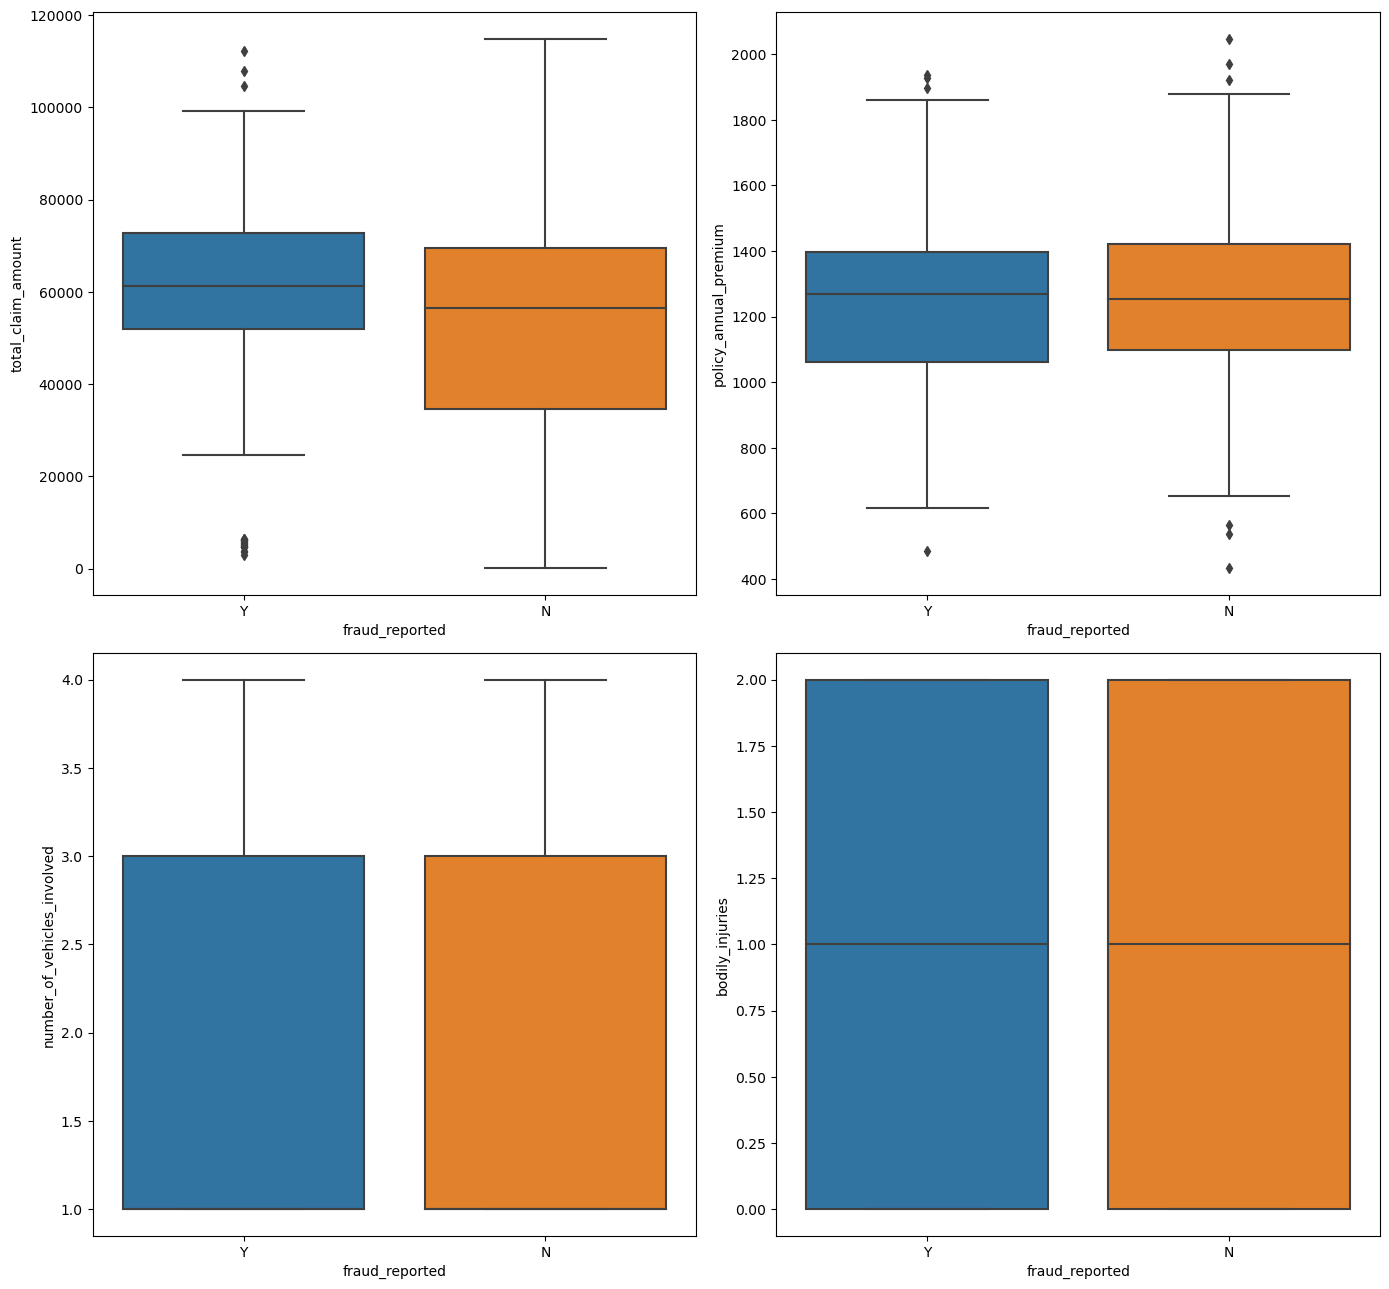

In [22]:
#Chaking Fradulent vs Non Fradulent
plt.figure(figsize=(14,13))
plt.subplot(2,2,1)
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='fraud_reported', y='policy_annual_premium', data=df)
plt.subplot(2,2,3)
sns.boxplot(x='fraud_reported', y='number_of_vehicles_involved', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='fraud_reported', y='bodily_injuries', data=df)

plt.tight_layout()
plt.show()

# Encoding Categorical Value to Numerical Values

In [23]:
categorical_columns= df.select_dtypes(include=['object']).columns.tolist()

In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()

for col in categorical_columns:
    df[col] = lb.fit_transform(df[col])

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
months_as_customer,1000.0,203.954,0.0,115.75,199.5,276.25,479.0,115.113174
age,1000.0,38.948,19.0,32.0,38.0,44.0,64.0,9.140287
policy_number,1000.0,546238.648,100804.0,335980.25,533135.0,759099.75,999435.0,257063.005276
policy_bind_date,1000,2002-02-08 04:40:47.999999872,1990-01-08 00:00:00,1995-09-19 00:00:00,2002-04-01 12:00:00,2008-04-21 12:00:00,2015-02-22 00:00:00,NaN
policy_state,1000.0,1.014,0.0,0.0,1.0,2.0,2.0,0.83096
policy_csl,1000.0,0.951,0.0,0.0,1.0,2.0,2.0,0.804516
policy_deductable,1000.0,1136.0,500.0,500.0,1000.0,2000.0,2000.0,611.864673
policy_annual_premium,1000.0,1256.40615,433.33,1089.6075,1257.2,1415.695,2047.59,244.167395
umbrella_limit,1000.0,1101000.0,-1000000.0,0.0,0.0,0.0,10000000.0,2297406.598118
insured_zip,1000.0,501214.488,430104.0,448404.5,466445.5,603251.0,620962.0,71701.610941


# Correlation

In [26]:
corr = df.corr()

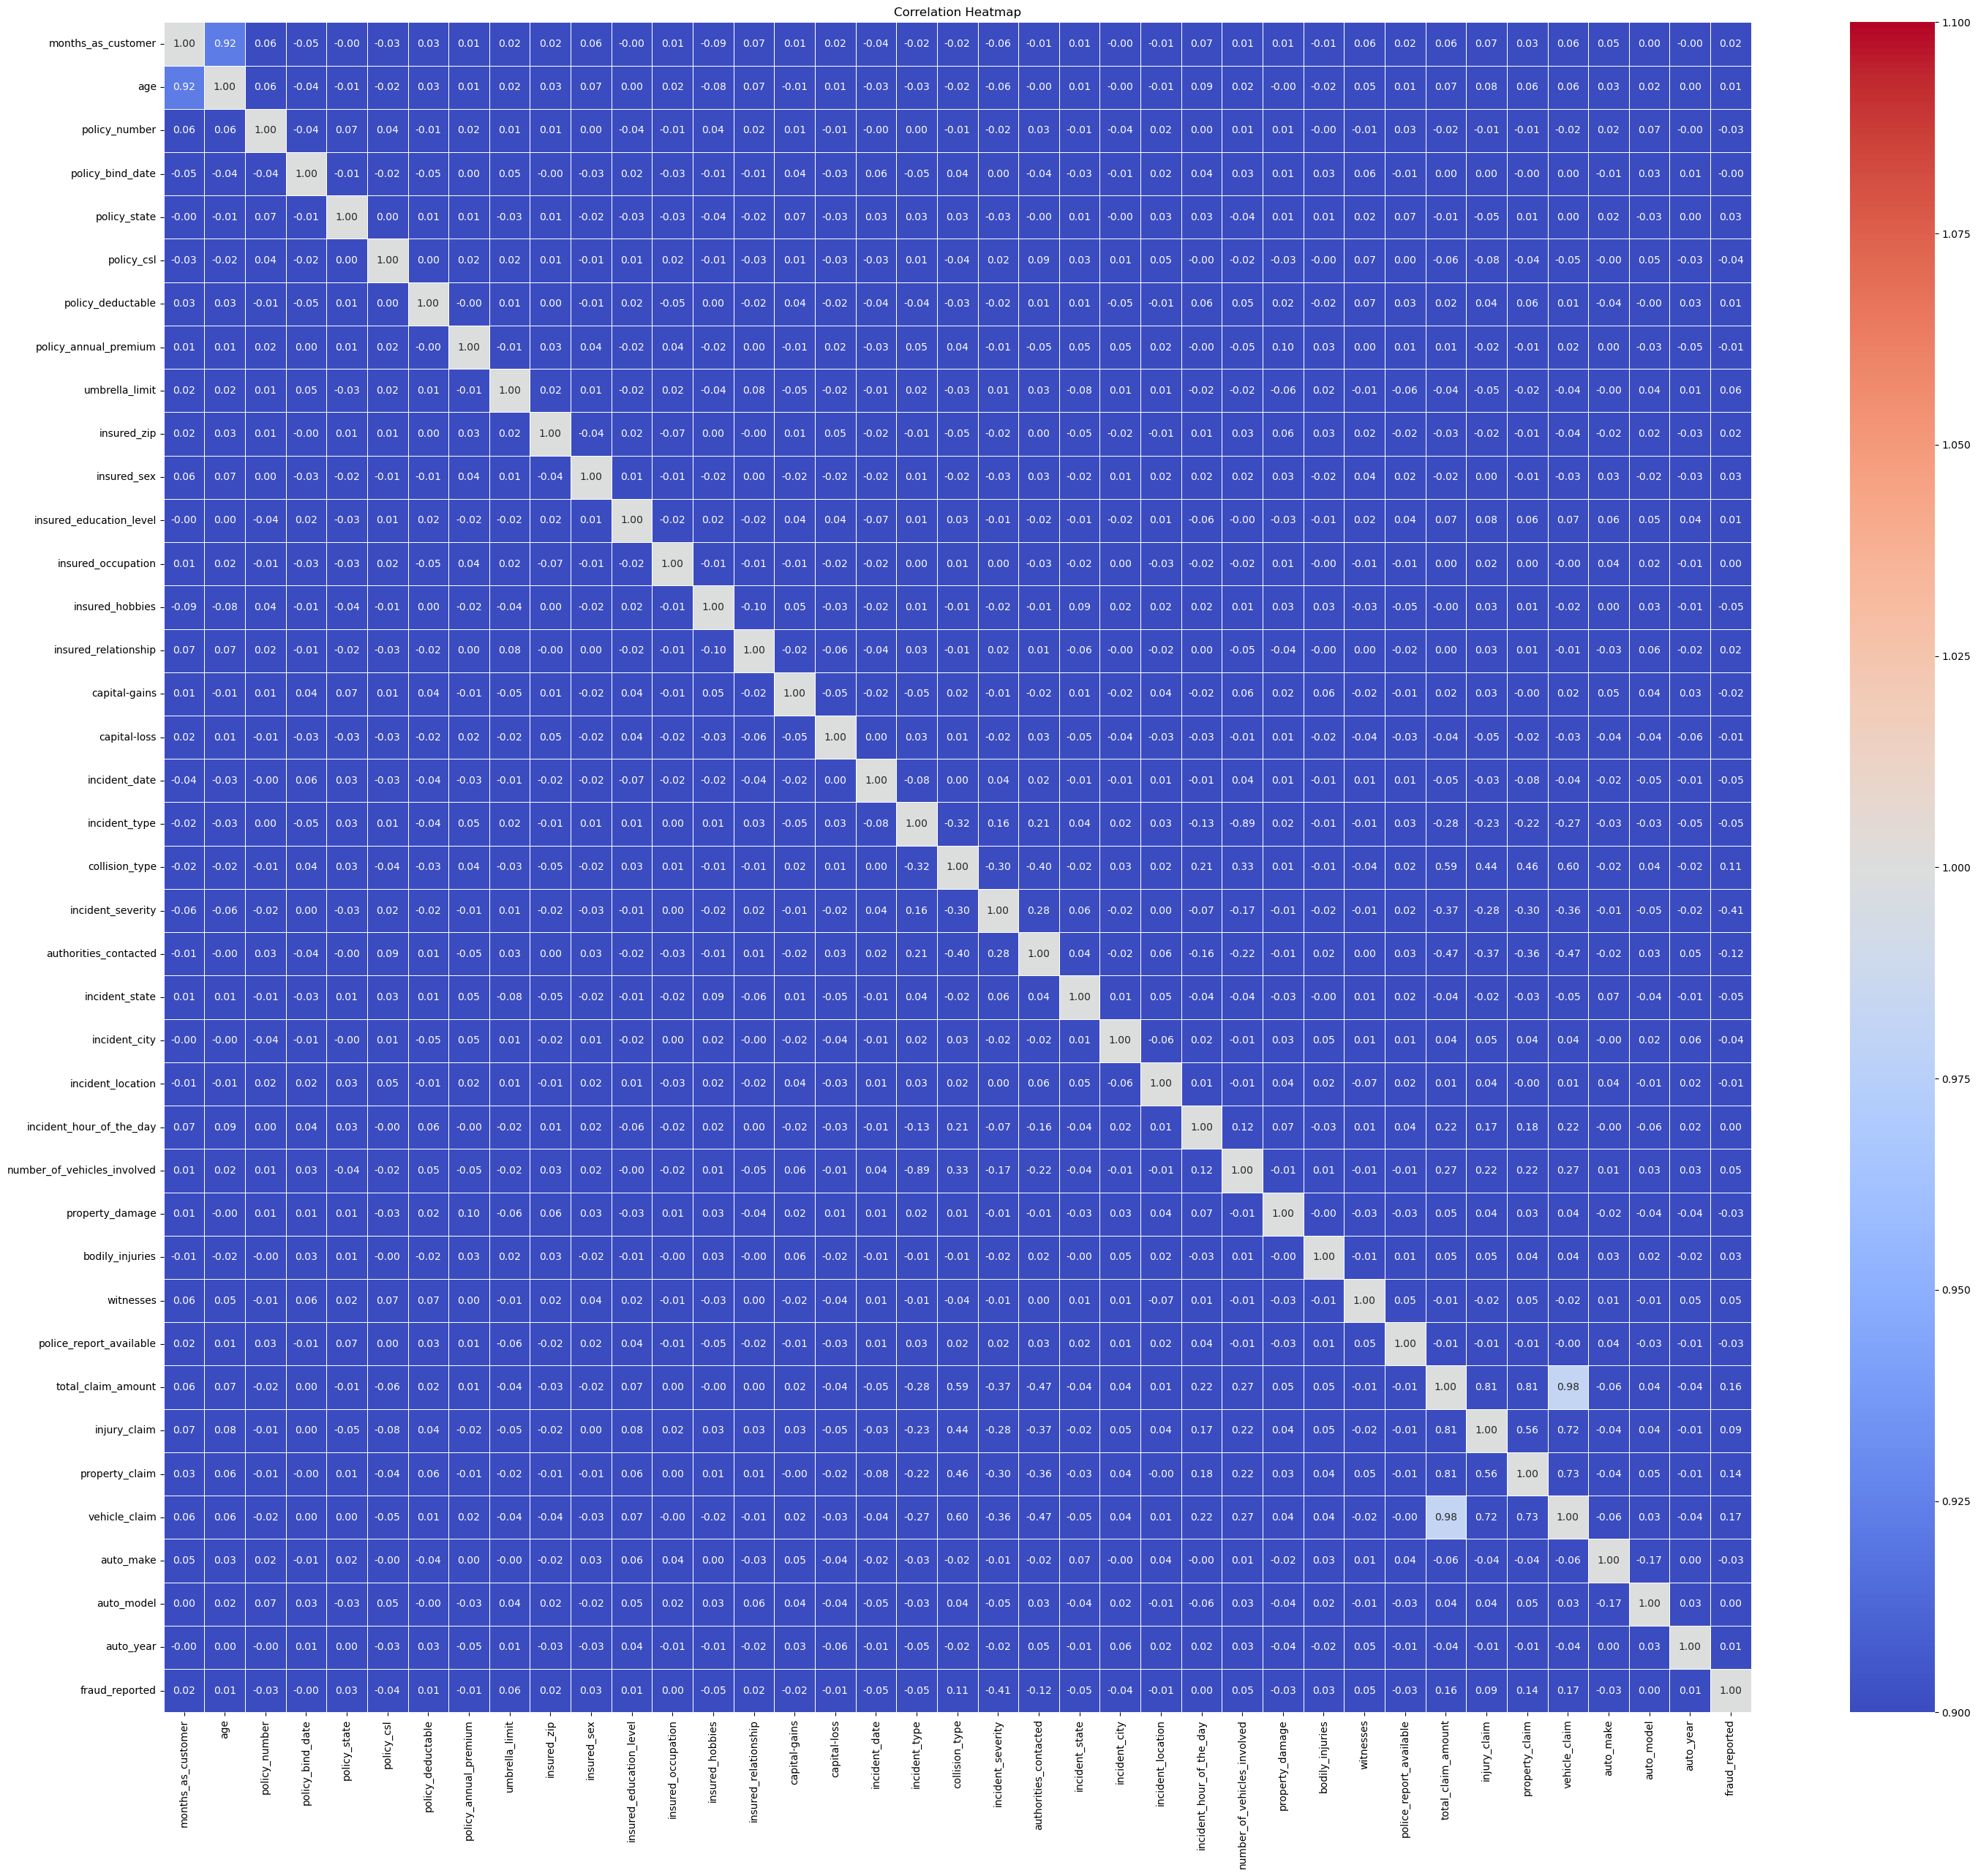

In [27]:
plt.figure(figsize=(35,30))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=1, vmax=1, linewidth=0.5) 
plt.title('Correlation Heatmap')
plt.show()

# Feature Scaling

In [28]:
scaler = StandardScaler()
numerical_features=df.select_dtypes(include=[np.number]).drop(columns=['fraud_reported'])

In [29]:
scaled_features = scaler.fit_transform(numerical_features)

In [30]:
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

In [31]:
df_scaled['fraud_reported'] = df['fraud_reported'].values

In [32]:
df_scaled.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,1.078140,0.208995,-0.608002,0.452355,0.208995,0.452355,-0.581927,-0.338567,-1.537987,0.069931,...,0.713099,0.461047,-0.955660,-0.694916,-0.547162,-1.746582,0.704407,-0.642767,2.208028,2.190645
age,0.990836,0.334073,-1.088913,0.224613,0.552994,0.005692,-0.541611,-0.213229,-0.651071,0.334073,...,0.443534,0.552994,-1.417295,-1.198374,-0.979453,-0.103769,0.224613,-0.541611,2.523284,2.304363
policy_number,-0.095953,-0.791527,0.550566,-1.239334,-0.695834,-1.718900,-0.514764,-0.456193,-0.235755,0.351496,...,0.455180,-1.700226,-1.288113,0.499471,0.526389,1.539740,-1.398429,1.448920,-0.047867,0.038303
policy_state,1.187173,-0.016856,1.187173,-1.220886,-1.220886,1.187173,-0.016856,-1.220886,-1.220886,-1.220886,...,-1.220886,1.187173,-0.016856,1.187173,-0.016856,1.187173,-1.220886,1.187173,-1.220886,1.187173
policy_csl,0.060937,0.060937,-1.182668,0.060937,1.304542,0.060937,0.060937,-1.182668,-1.182668,-1.182668,...,-1.182668,-1.182668,-1.182668,0.060937,1.304542,1.304542,-1.182668,0.060937,1.304542,0.060937
policy_deductable,-0.222383,1.412784,1.412784,1.412784,-0.222383,-0.222383,-0.222383,-0.222383,-1.039966,-1.039966,...,-1.039966,-0.222383,-1.039966,-0.222383,-0.222383,-0.222383,-0.222383,-1.039966,1.412784,-0.222383
policy_annual_premium,0.616705,-0.242521,0.642233,0.652886,1.341980,0.388018,0.315285,-0.489156,0.764546,0.242881,...,1.262159,0.100284,-2.187078,-0.087140,0.371381,0.222884,0.739141,0.520739,0.411866,-2.008710
umbrella_limit,-0.479476,1.697980,1.697980,2.133471,2.133471,-0.479476,-0.479476,-0.479476,-0.479476,-0.479476,...,0.826998,-0.479476,-0.479476,-0.479476,-0.479476,-0.479476,-0.479476,0.826998,1.697980,-0.479476
insured_zip,-0.489529,-0.461008,-0.984885,1.491682,1.527808,-0.317564,-0.830222,1.423002,1.402616,1.392137,...,-0.328895,-0.938154,-0.942130,-0.804394,-0.984424,-0.975717,1.492519,-0.815138,-0.830250,1.549492
insured_sex,1.076953,1.076953,-0.928546,-0.928546,1.076953,-0.928546,1.076953,1.076953,-0.928546,1.076953,...,-0.928546,1.076953,1.076953,1.076953,1.076953,-0.928546,-0.928546,-0.928546,1.076953,-0.928546


# Machine Learning Model

In [33]:
x = df_scaled.drop('fraud_reported', axis=1)
y = df_scaled['fraud_reported']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
#Evaluate Multiple Model
models= {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier()
    
}

In [36]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print("\n")

Model: Logistic Regression
Confusion Matrix:
 [[191  29]
 [ 60  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       220
           1       0.41      0.25      0.31        80

    accuracy                           0.70       300
   macro avg       0.58      0.56      0.56       300
weighted avg       0.67      0.70      0.68       300

ROC AUC Score: 0.7053977272727273


Model: Decision Tree
Confusion Matrix:
 [[184  36]
 [ 37  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       220
           1       0.54      0.54      0.54        80

    accuracy                           0.76       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.76      0.76      0.76       300

ROC AUC Score: 0.6869318181818183


Model: Random Forest
Confusion Matrix:
 [[199  21]
 [ 55  25]]
Classification Report:
        

# Cross Validation

In [37]:
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean CV Accuracy: {scores.mean()} +_ {scores.std()}")

Logistic Regression - Mean CV Accuracy: 0.774 +_ 0.03426368339802363
Decision Tree - Mean CV Accuracy: 0.7790000000000001 +_ 0.004898979485566361
Random Forest - Mean CV Accuracy: 0.77 +_ 0.028635642126552733
SVM - Mean CV Accuracy: 0.748 +_ 0.01536229149573723
XGBoost - Mean CV Accuracy: 0.819 +_ 0.02517935662402832


# Hyper parameter Tuning


In [38]:
xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,6,10],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0] 
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

In [40]:
grid_search.fit(x_train, y_train)

print("Best parameter found:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameter found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.9}
Best ROC AUC Score: 0.8769219574461932


# Final Model

In [41]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(x_test)
y_pred_proba = final_model.predict_proba(x_test)[:,1]

In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba)*100)

Confusion Matrix:
 [[195  25]
 [ 33  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       220
           1       0.65      0.59      0.62        80

    accuracy                           0.81       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.80      0.81      0.80       300

ROC AUC Score: 83.47727272727273


# Saving Model 

In [43]:
import joblib 
joblib.dump(model, 'Insurance_claims_fraud_detection.pkl')

['Insurance_claims_fraud_detection.pkl']

# <span style="color:Red"> *******************Thanking You****************</span> <span style ="color:blue">